In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [2]:
global warna
global bau
global texture
global keadaan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
local_zip = '/content/drive/My Drive/ [UAS SC 2020] Kelompok 7/Daging_09.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 1):
      print("\nAkurasi di atas 97%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [6]:
base_dir = '/content/drive/My Drive/ [UAS SC 2020] Kelompok 7/Daging'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
bagus_dir = os.path.join(base_dir,'daging bagus')
tidakBagus_dir = os.path.join(base_dir, 'daging tidak bagus')


In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
train_bagus = os.path.join(train_dir, 'daging bagus')
train_tidakBagus = os.path.join(train_dir, 'daging tidak bagus')
val_bagus = os.path.join(validation_dir, 'daging bagus')
val_tidakBagus = os.path.join(validation_dir, 'daging tidak bagus')

In [ ]:
os.mkdir(train_bagus)
os.mkdir(train_tidakBagus)

os.mkdir(val_bagus)
os.mkdir(val_tidakBagus)

In [8]:
train_bagus_dir, val_bagus_dir = train_test_split(os.listdir(bagus_dir), test_size = 0.40)
train_tidakBagus_dir, val_tidakBagus_dir = train_test_split(os.listdir(tidakBagus_dir), test_size = 0.40)

In [9]:
for file in train_bagus_dir:
  shutil.copy(os.path.join(bagus_dir, file), os.path.join(train_bagus, file))
for file in train_tidakBagus_dir:
  shutil.copy(os.path.join(tidakBagus_dir,file), os.path.join(train_tidakBagus,file))

for file in val_bagus_dir:
  shutil.copy(os.path.join(bagus_dir, file), os.path.join(val_bagus,file))
for file in val_tidakBagus_dir:
  shutil.copy(os.path.join(tidakBagus_dir,file), os.path.join(val_tidakBagus,file))


In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 14 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(2, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [ ]:
history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
1/1 - 4s - loss: 0.6984 - accuracy: 0.4286 - val_loss: 2.3586 - val_accuracy: 0.5333
Epoch 2/20
1/1 - 2s - loss: 1.8166 - accuracy: 0.5714 - val_loss: 1.0748 - val_accuracy: 0.4667
Epoch 3/20
1/1 - 2s - loss: 1.0778 - accuracy: 0.4286 - val_loss: 0.7240 - val_accuracy: 0.4667
Epoch 4/20
1/1 - 1s - loss: 0.7304 - accuracy: 0.4286 - val_loss: 0.6850 - val_accuracy: 0.5333
Epoch 5/20
1/1 - 1s - loss: 0.6776 - accuracy: 0.6429 - val_loss: 0.6807 - val_accuracy: 0.5333
Epoch 6/20
1/1 - 2s - loss: 0.6743 - accuracy: 0.5714 - val_loss: 0.6788 - val_accuracy: 0.5333
Epoch 7/20
1/1 - 2s - loss: 0.6662 - accuracy: 0.5714 - val_loss: 0.6834 - val_accuracy: 0.5333
Epoch 8/20
1/1 - 2s - loss: 0.6516 - accuracy: 0.5714 - val_loss: 0.6975 - val_accuracy: 0.5333
Epoch 9/20
1/1 - 2s - loss: 0.6554 - accuracy: 0.5714 - val_loss: 0.6992 - val_accuracy: 0.5333
Epoch 10/20
1/1 - 2s - loss: 0.6491 - accuracy: 0.5714 - val_loss: 0.6705 - val_accuracy: 0.5333
Epoch 11/20
1/1 - 1s - loss: 0.6328 - a

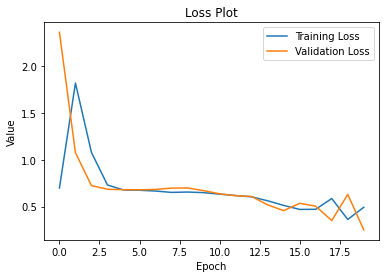

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

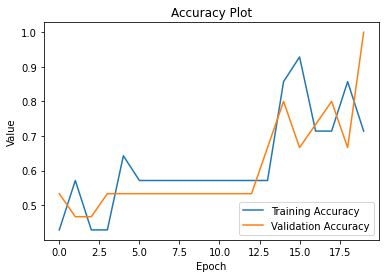

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



warna = input("warna  merah/tidak : ")
bau = input ("bau  segar/tidak : ")
texture = input ("texture kenyal/tidak : ")
keadaan = input ("keadaan  berlendir/tidak berlendir  :")

def cekdaging(warna, bau, texture,keadaan):
  if warna == "merah" :
     warna == "accept" 
  elif warna != "merah" :
     warna == "denied"

  if bau == "segar":
     bau == "accept"
  elif bau != "segar" : 
     bau == "denied"

  if texture == "kenyal":
     texture == "accept"
  elif texture != "kenyal" : 
     texture == "denied"

  if keadaan == "tidak berlendir" :
     keadaan == "accept"
  elif keadaan != "tidak berlendir": 
     keadaan == "denied"


uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  cekdaging(warna,bau,texture,keadaan)

  print(fn)
  if classes[0,0]!=0:
    if warna=="merah" and bau=="segar" and texture == "kenyal" and keadaan == "tidak berlendir" :
      print('bagus')
    else :
      print ('tidak bagus (hati-hati!)')
  else:
    print('tak bagus')

warna  merah/tidak : merah
bau  segar/tidak : tidak
texture kenyal/tidak : tidak
keadaan  berlendir/tidak berlendir  :berlendir
